[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


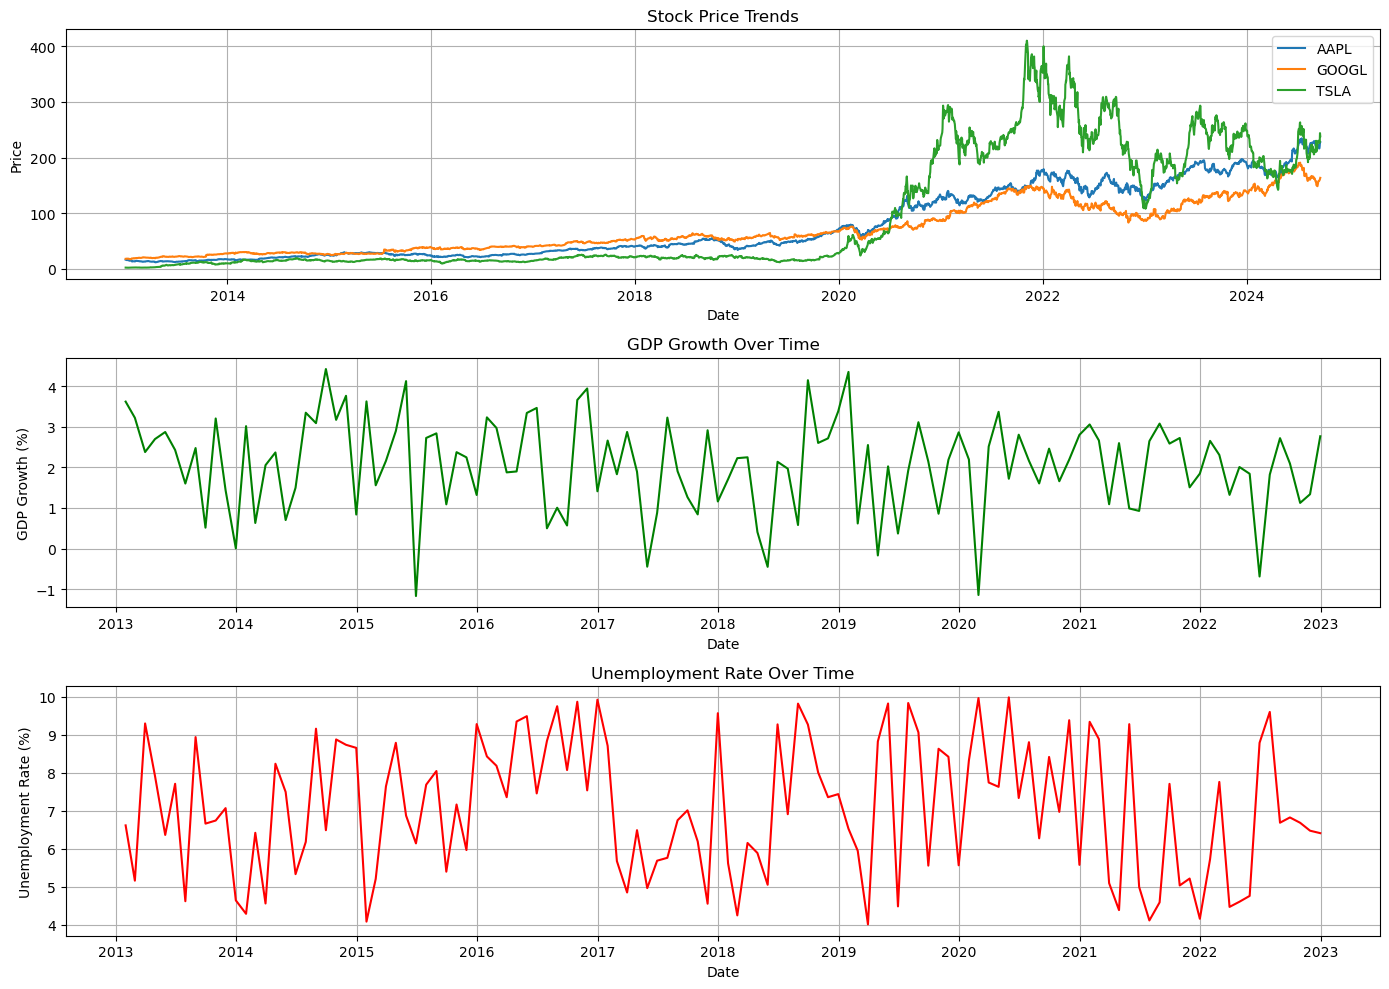

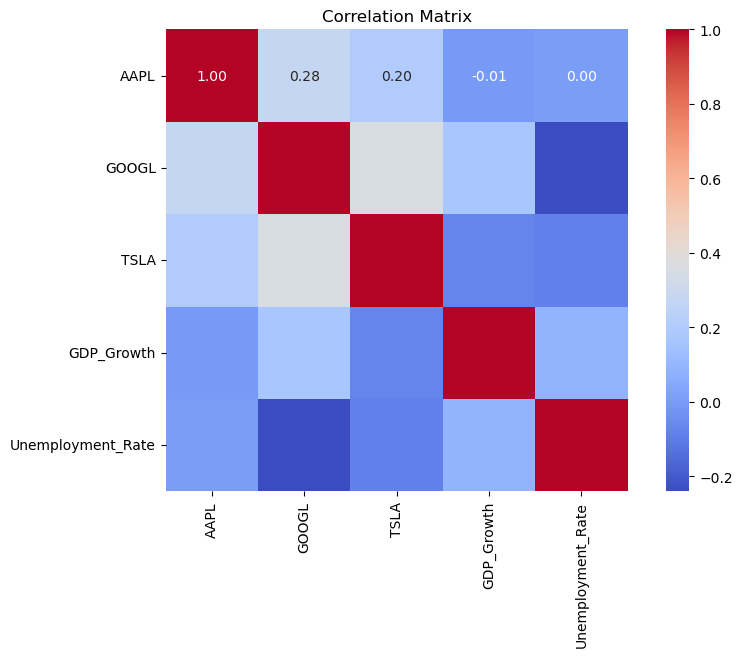


    Analysis Summary:
    ------------------------
    1. The stock price trends provide insights into how major companies have performed over time.
    2. The GDP growth and unemployment rate graphs illustrate the economic environment during the same period.
    3. The correlation matrix reveals the relationships between stock returns and macroeconomic indicators, 
       helping identify trends and dependencies that could impact investment decisions.
    4. This analysis demonstrates a robust understanding of how financial markets interact with economic variables.
    


In [2]:
# Step 0: Install Required Libraries
# Uncomment the following line if libraries are not installed
# !pip install numpy pandas yfinance matplotlib seaborn

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define Functions to Retrieve Data
def retrieve_stock_data(tickers, start_date='2013-01-01'):
    """Retrieve adjusted closing prices for specified tickers."""
    data = pd.DataFrame()
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start=start_date)['Adj Close']
    return data

def retrieve_macro_data():
    """Retrieve macroeconomic data (example: GDP growth and unemployment rates)."""
    # For this example, we'll create mock data
    # In practice, you would use a reliable source like FRED or World Bank
    dates = pd.date_range(start='2013-01-01', periods=120, freq='M')
    gdp_growth = np.random.normal(loc=2, scale=1, size=len(dates))  # Mock GDP growth data
    unemployment_rate = np.random.uniform(4, 10, size=len(dates))  # Mock unemployment rates
    macro_data = pd.DataFrame({'GDP_Growth': gdp_growth, 'Unemployment_Rate': unemployment_rate}, index=dates)
    return macro_data

# Step 3: Calculate Log Returns
def calculate_log_returns(prices):
    """Calculate log returns from price data."""
    return np.log(prices / prices.shift(1))

# Step 4: Data Visualization
def visualize_data(prices, macro_data):
    """Visualize stock price trends and macroeconomic indicators."""
    
    # Set up the figure
    plt.figure(figsize=(14, 10))

    # Plot stock prices
    plt.subplot(3, 1, 1)
    for column in prices:
        plt.plot(prices.index, prices[column], label=column)
    plt.title('Stock Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Plot GDP Growth
    plt.subplot(3, 1, 2)
    plt.plot(macro_data.index, macro_data['GDP_Growth'], color='green')
    plt.title('GDP Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('GDP Growth (%)')
    plt.grid()

    # Plot Unemployment Rate
    plt.subplot(3, 1, 3)
    plt.plot(macro_data.index, macro_data['Unemployment_Rate'], color='red')
    plt.title('Unemployment Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Step 5: Correlation Analysis
def plot_correlations(prices, macro_data):
    """Visualize correlations between stock returns and economic indicators."""
    log_returns = calculate_log_returns(prices).dropna()

    # Combine log returns with macro data
    combined_data = log_returns.join(macro_data, how='inner')
    correlation_matrix = combined_data.corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

# Main Execution
if __name__ == "__main__":
    assets = ['AAPL', 'GOOGL', 'TSLA']  # Example assets
    stock_data = retrieve_stock_data(assets)
    macro_data = retrieve_macro_data()

    # Visualize the data
    visualize_data(stock_data, macro_data)

    # Plot correlations
    plot_correlations(stock_data, macro_data)

    print("""
    Analysis Summary:
    ------------------------
    1. The stock price trends provide insights into how major companies have performed over time.
    2. The GDP growth and unemployment rate graphs illustrate the economic environment during the same period.
    3. The correlation matrix reveals the relationships between stock returns and macroeconomic indicators, 
       helping identify trends and dependencies that could impact investment decisions.
    4. This analysis demonstrates a robust understanding of how financial markets interact with economic variables.
    """)
